# Objective: Explore the relationship between model complexity and generalization performance through example. Part 1 looks at regression and Part 2 looks at Poisonous Mushroom classification

## Part 1 - Regression

Set up the variables

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=0)

# use this function to visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

### Step 1

This function fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (I Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, I find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array corresponds to the output from the model trained on d|egree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<br>
*This function returns a numpy array with shape `(4, 100)`*

In [3]:
def step_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Change the shape of the training inputs and prediction inputs
    # return evenly spaced numbers over interval 0, 10 as prediction inputs
    predict = np.linspace(0,10,100)

    # change the shape from a 1 x 100 shape to a 100 x 1 shape
    predict = predict.reshape(100,1)

    # change the shape of the training data from 1 x X_train.size 
    # to X_train.size x 1
    X_train_reshaped = X_train.reshape(X_train.size,1)

    # create a polynomial model with degree 1
    degrees = [1,3,6,9]
    answer = []
    for n in degrees:
        poly = PolynomialFeatures(degree = n)
        X_poly = poly.fit_transform(X_train_reshaped)
        y_poly = poly.fit_transform(predict)
        linreg1 = LinearRegression().fit(X_poly, y_train)
        arr =linreg1.predict(y_poly)
        answer.append(arr)

    #Stack arrays in sequence vertically (row wise)
    answer = np.vstack(answer)
    return answer
#step_one()

<IPython.core.display.Javascript object>


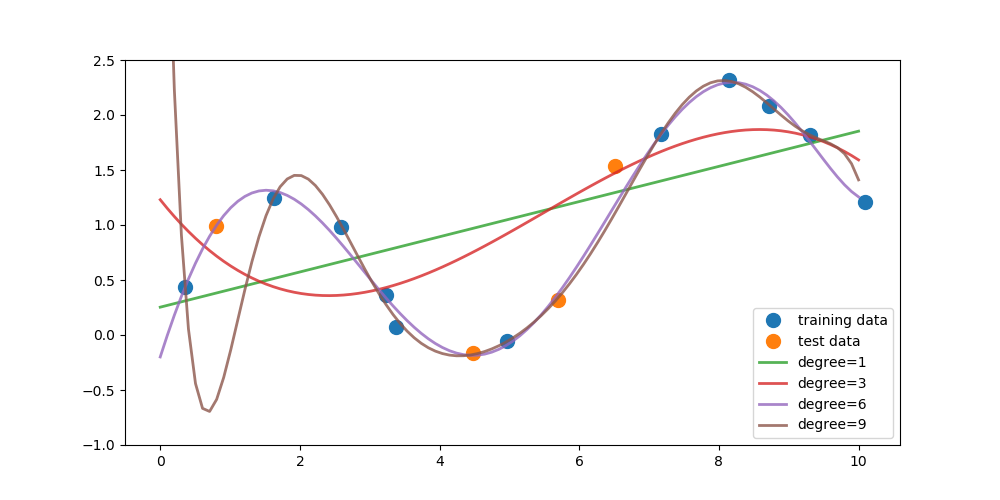

In [4]:
# this figure shows the fitted models plotted on top of the original data
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(step_one())

### Step 2

This function fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model I compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function returns one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays have shape `(10,)`*

In [5]:
def step_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    results_train = np.zeros([10,1])
    results_test = np.zeros([10,1])


    #loop through the degrees 0 to 9
    for i in range(0,10):
        #create the polynomial transformation
        poly = PolynomialFeatures(degree = i)

        #transform the data
        X_train_poly = poly.fit_transform(X_train.reshape(X_train.size,1))
        X_test_poly = poly.fit_transform(X_test.reshape(X_test.size,1))

        #train the linear regression model with the transformed data
        linreg = LinearRegression().fit(X_train_poly, y_train)

        score_train = r2_score(y_train, linreg.predict(X_train_poly))
        score_test = r2_score(y_test, linreg.predict(X_test_poly))

        results_train[i] = score_train
        results_test[i] = score_test

        results_train = results_train.flatten()
        results_test= results_test.flatten()
    answer = (results_train, results_test)

    return answer
step_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.6324795 , -0.64524602]))

### Step 3

Based on the $R^2$ scores from step 2 (degree levels 0 through 9), I determine what degree level corresponds to an underfitting model. I then determine what degree level corresponds to an overfitting model. I then determine the degree level that would provide a model with good generalization performance. I do this by plotting the $R^2$ scores from step 2. This allows me to visualize the relationship between degree level and $R^2$

*This function return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`.* 

<IPython.core.display.Javascript object>


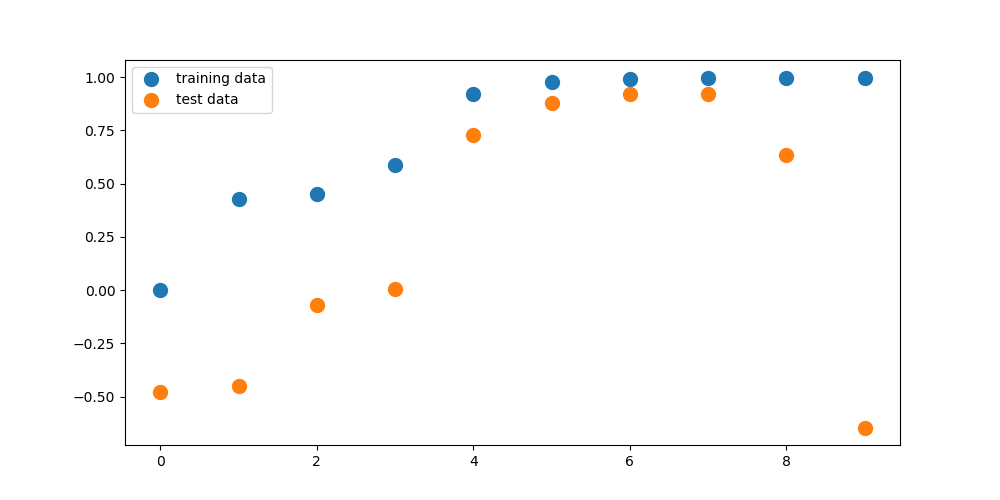

(0, 9, 6)

In [6]:
def step_three():
    import matplotlib.pyplot as plt
    (results_train, results_test) = step_two()
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(range(0,10,1), results_train, 'o', label='training data', markersize=10)
    plt.plot(range(0,10,1), results_test, 'o', label='test data', markersize=10)
    plt.legend()
    return (0,9,6)
step_three()

### Step 4

Training models on high degree polynomial features can result in overly complex models that overfit, so I will use regularized versions of the model to constrain model complexity, as such as with with Ridge and Lasso linear regression.

Here I train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. I return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function returns one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [7]:
def step_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics.regression import r2_score

    poly = PolynomialFeatures(degree = 12)
    
    X_train_poly = poly.fit_transform(X_train.reshape(X_train.size,1))
    X_test_poly = poly.fit_transform(X_test.reshape(X_test.size,1))
    
    linreg = LinearRegression().fit(X_train_poly, y_train)
    linlasso = Lasso(alpha = 0.01, max_iter = 10000).fit(X_train_poly, y_train)
    
    score_linreg_test = linreg.score(X_test_poly, y_test)
    score_linlasso_test = linlasso.score(X_test_poly, y_test)
    return (score_linreg_test,score_linlasso_test)
step_four()

C:\Users\willi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.311965181152168, 0.8406625614750356)

## Part 2 - Poison Mushroom Classification

I am working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous.

The data in the mushrooms dataset is currently encoded with strings. These values will be encoded to numeric to work with sklearn. I'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for step 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in step 6 and 7, I will create a smaller version of the
# entire mushroom dataset for use in those steps.  For simplicity I'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for step 6 and 7.
X_subset = X_test2
y_subset = y_test2

### Step 5

Using `X_train2` and `y_train2` from the preceeding cell, I train a DecisionTreeClassifier with default parameters and random_state=0. I then conclude what are the 5 most important features found by the decision tree.

*This function returns a list of length 5 containing the feature names in descending order of importance.*

In [10]:
def step_five():
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state = 0).fit(X_train2,y_train2)
    #The feature importances. The higher, the more important the feature.
    #The importance of a feature is computed as the (normalized) total reduction of the criterion
    #brought by that feature. It is also known as the Gini importance
    #.argsort() Returns the indices that would sort an array in ascending order
    #[-5:] get the last five indices
    top_five_index = clf.feature_importances_.argsort()[-5:]
    
    #reverse indices so it is in descending order
    top_five_index = top_five_index[::-1]
    result = list(X_train2.columns[top_five_index])
    return result
step_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Step 6

I use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.

**Because creating a validation curve requires fitting multiple models, for performance reasons this step will use just a subset of the original mushroom dataset: I use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.**

The initialized unfitted classifier object I'll be using is a Support Vector Classifier with radial basis kernel.

With this classifier, and the dataset in X_subset, y_subset, I explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`). In this case, I use "accuracy" as the scoring metric.

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

I find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

To clarify what I mean:

if one of my array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it becomes

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function returns one tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [11]:
def step_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    #Return numbers spaced evenly on a log scale.
    param_range = np.logspace(-4,1,6)
    clf = SVC(kernel = 'rbf', C =1, random_state = 0)

    #Validation_curve determine training and test scores for varying parameter values
    #in this case, validation_curve will determine training and test scores when varying gamma based off paramrange
    train_scores, test_scores = validation_curve(clf, X_subset, y_subset, 
                                         param_name='gamma', 
                                         param_range=param_range, cv=3, scoring="accuracy")

    #compute the mean results
    training_scores = np.mean(train_scores, axis=1)
    testing_scores = np.mean(test_scores, axis=1)

    result = (training_scores,testing_scores)
    return result
step_six()

(array([0.56647847, 0.93155951, 0.99039881, 1.        , 1.        ,
        1.        ]),
 array([0.56768547, 0.92959558, 0.98965952, 1.        , 0.99507994,
        0.52240279]))

### Step 7

Based on the scores from Step 6, I determine what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy). I also determine what gamma value corresponds to a model that is overfitting (and has the worst test set accuracy). I then determine what choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)? 

I do this by plotting the scores from step 6 to visualize the relationship between gamma and accuracy. 

*This function returns one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

<IPython.core.display.Javascript object>


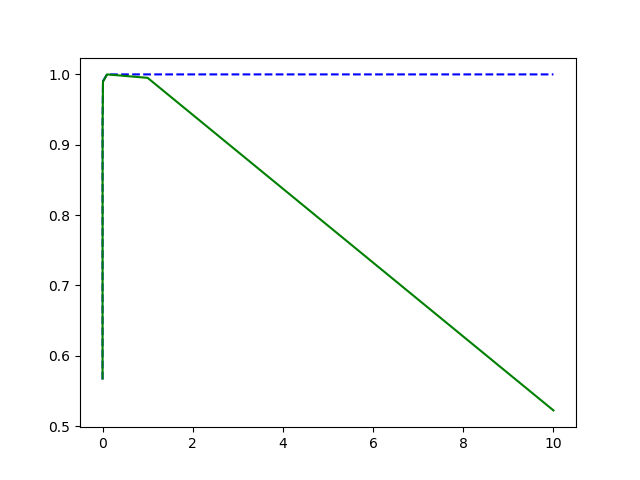

In [12]:
#visualization
import matplotlib.pyplot as plt
train_scores,test_scores = step_six()
gamma = np.logspace(-4,1,6)
plt.figure()
plt.plot(gamma, train_scores, 'b--')#, gamma, test_scores, 'g-')
plt.plot(gamma, test_scores, 'g-')

In [13]:
def Step_seven():
    Underfitting = .001
    Overfitting = 10
    Good_Generalization = .01
    return (Underfitting, Overfitting, Good_Generalization)
Step_seven()

(0.001, 10, 0.01)